In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
print(X_test.shape)

(10000, 32, 32, 3)


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ['airplane', 'automobile', 'bird', 'cat','deer','dog','frog','horse','ship','truck']

In [10]:
def plot_sample(X,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

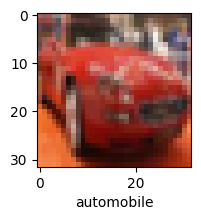

In [11]:
plot_sample(X_train, y_train, 5)

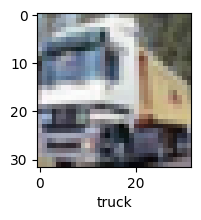

In [12]:
plot_sample(X_train, y_train, 1 )

In [13]:
X_train = X_train /255.0
X_test = X_test / 255.0

In [14]:
if X_train.shape[0] == y_train.shape[0]:
    amn = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax'),
    ])
    amn.compile(optimizer='SGD',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    amn.fit(X_train, y_train, epochs=5)
else:
    print('Mismatch in number of samples between X_train and y_train.')
    print("X_train samples:", X_train.shape[0])
    print("y_train samples:", y_train.shape[0])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3071 - loss: 1.9299
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4200 - loss: 1.6393
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.4519 - loss: 1.5497
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.4787 - loss: 1.4857
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.4995 - loss: 1.4311


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = amn.predict(X_test)
y_pred_classes =[np.argmax(element) for element in y_pred]
print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.52      0.60      0.56      1000
           1       0.70      0.45      0.55      1000
           2       0.41      0.29      0.34      1000
           3       0.37      0.31      0.33      1000
           4       0.43      0.44      0.43      1000
           5       0.45      0.32      0.37      1000
           6       0.47      0.64      0.54      1000
           7       0.53      0.57      0.55      1000
           8       0.64      0.61      0.63      1000
           9       0.47      0.70      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



In [16]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

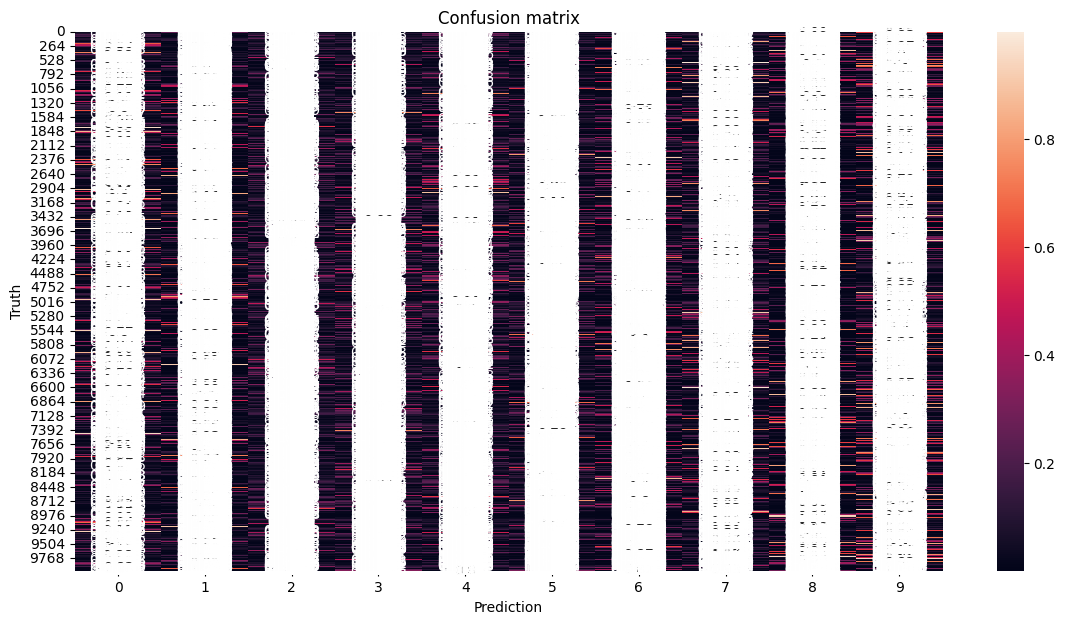

In [17]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [18]:
from tensorflow.keras import models, layers

cnn = models.Sequential([
    layers.Input(shape=(32, 32, 3)),  # Using Input layer to specify input shape
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),  # Corrected typo here
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [20]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3598 - loss: 1.7341
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5845 - loss: 1.1671
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6371 - loss: 1.0247
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6769 - loss: 0.9350
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6988 - loss: 0.8659
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7178 - loss: 0.8095
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7388 - loss: 0.7581
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7521 - loss: 0.7178
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7649 - loss: 0.6757
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7736 - loss: 0.6507


In [21]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7077 - loss: 0.8738


[0.885780930519104, 0.7069000005722046]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[2.74441787e-04, 3.14994286e-05, 2.32916471e-04, 7.08391964e-01,
        6.84394501e-04, 2.85642505e-01, 2.17326684e-03, 2.11340783e-04,
        2.33703479e-03, 2.07577777e-05],
       [1.41387386e-03, 2.02500373e-02, 3.21372636e-06, 1.47229372e-07,
        3.93392696e-07, 9.04353303e-09, 4.59005122e-07, 1.86647526e-07,
        9.77865398e-01, 4.66433819e-04],
       [1.01019718e-01, 1.59090292e-02, 1.68321319e-02, 1.44051425e-02,
        1.19270533e-02, 1.61367084e-03, 1.20057678e-03, 7.66099058e-03,
        8.07561457e-01, 2.18701139e-02],
       [7.80466497e-01, 4.36598295e-03, 4.39447947e-02, 7.70835846e-04,
        1.92593667e-03, 6.90550451e-06, 6.44598476e-05, 1.58017319e-05,
        1.68348849e-01, 9.00022933e-05],
       [2.09158486e-08, 1.85094166e-06, 2.26895371e-03, 6.05258334e-04,
        6.56065047e-02, 1.09379005e-04, 9.31401968e-01, 6.93241446e-08,
        5.42181215e-06, 4.54165843e-07]], dtype=float32)

In [23]:
y_classes= [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

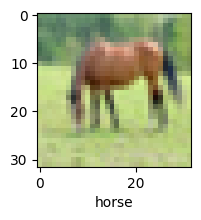

In [25]:
plot_sample(X_test, y_test, 60)

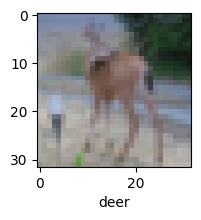

In [26]:
plot_sample(X_test, y_test, 100)

In [27]:
classes[y_classes[60]]

'horse'